In [2]:
from pandas_datareader import data as pdr
from datetime import datetime as dtt

import pandas as pd
import plotly.offline as py_offline
import plotly.graph_objs as go
import fix_yahoo_finance as yf


TnS_dataframe = pd.read_csv("data/TnS.csv")
TnS_dataframe['EventTime'] = TnS_dataframe['EventTime'].map(lambda x: datetime.strptime(str(x[:19]), "%Y%m%d-%H%M%S.%f"))

df = TnS_dataframe.loc[:, ["EventTime", "Price"]]
df = df.set_index('EventTime')
test = df.resample('1min').ohlc().bfill()['Price']

yf.pdr_override()
symbol_candle = go.Candlestick(x=test.index,
                            open=test.open,
                            high=test.high,
                            low=test.low,
                            close=test.close,
                            increasing=dict(line=dict(color= '#00FF00')),
                            decreasing=dict(line=dict(color= '#FF0000'))
                           )
data = [symbol_candle]

layout = go.Layout(
    plot_bgcolor='rgb(59,68,75)'
)

fig = go.Figure(data=data, layout=layout)
py_offline.iplot(fig, filename='Candle Stick')

/Users/tongcc/miniconda3/envs/tradingview/lib/python3.13/site-packages/fix_yahoo_finance/__init__.py:0: DeprecationWarning:



*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance




FileNotFoundError: [Errno 2] No such file or directory: 'data/TnS.csv'

### using yfinance

In [ ]:
import yfinance as yf
import pandas as pd
 
symbols = ['^GSPC','^VIX', '^FTSE', '^N225', '^HSI']
data = yf.download(symbols, start='2022-12-01', end  ='2022-12-06')
print(data)

/var/folders/2w/3x_dqx25277_kfl6xbpr7gvr0000gn/T/ipykernel_1433/1052189102.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbols, start='2024-06-09', end  ='2025-06-07', interval='1d')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker             TSM         TSM         TSM         TSM       TSM
Date                                                                
2024-06-10  165.839874  167.496688  160.179065  161.737267  12438400
2024-06-11  163.423691  166.086436  161.530168  165.859598  11508600
2024-06-12  170.593399  173.630906  169.173264  170.968161  20309500
2024-06-13  171.062332  172.209940  168.687969  171.101898  15591800
2024-06-14  170.666595  171.784525  168.539576  170.162051   9192500
...                ...         ...         ...         ...       ...
2025-06-02  194.839996  195.160004  192.199997  193.039993   7447400
2025-06-03  197.610001  198.169998  193.639999  194.350006   9548300
2025-06-04  202.399994  204.029999  200.380005  201.380005  13531100
2025-06-05  203.339996  205.759995  202.279999  204.880005  12214300
2025-06-06  205.179993  206.289993  203.229996  203.580002   8526500

[249 rows x 5 columns]


In [7]:
# Splitting the downloaded data into separate DataFrames
adj_close_df = None
if 'Adj Close' in data.columns:
    adj_close_df = data['Adj Close']
    print("Adj Close:"); print(adj_close_df.round(2))
close_df     = data['Close']
high_df      = data['High']
low_df       = data['Low']
open_df      = data['Open']
volume_df    = data['Volume']
 
# Printing the separate DataFrames
print("\nClose:");   print(close_df.round(2))
print("\nHigh:");    print(high_df.round(2))
print("\nLow:");     print(low_df.round(2))
print("\nOpen:");    print(open_df.round(2))
print("\nVolume:");  print(volume_df)


Close:
Ticker         TSM
Date              
2024-06-10  165.84
2024-06-11  163.42
2024-06-12  170.59
2024-06-13  171.06
2024-06-14  170.67
...            ...
2025-06-02  194.84
2025-06-03  197.61
2025-06-04  202.40
2025-06-05  203.34
2025-06-06  205.18

[249 rows x 1 columns]

High:
Ticker         TSM
Date              
2024-06-10  167.50
2024-06-11  166.09
2024-06-12  173.63
2024-06-13  172.21
2024-06-14  171.78
...            ...
2025-06-02  195.16
2025-06-03  198.17
2025-06-04  204.03
2025-06-05  205.76
2025-06-06  206.29

[249 rows x 1 columns]

Low:
Ticker         TSM
Date              
2024-06-10  160.18
2024-06-11  161.53
2024-06-12  169.17
2024-06-13  168.69
2024-06-14  168.54
...            ...
2025-06-02  192.20
2025-06-03  193.64
2025-06-04  200.38
2025-06-05  202.28
2025-06-06  203.23

[249 rows x 1 columns]

Open:
Ticker         TSM
Date              
2024-06-10  161.74
2024-06-11  165.86
2024-06-12  170.97
2024-06-13  171.10
2024-06-14  170.16
...            ...
2025-06

In [8]:
# Create a MultiIndex from the columns
data.columns = data.columns.swaplevel(0, 1)
data.sort_index(axis=1, level=0, inplace=True)
 
# Split the data based on symbols
symbol_dfs = {}
for symbol in symbols:
    # Create a copy of the DataFrame
    symbol_dfs[symbol] = data[symbol].copy()  
    # Divide 'Volume' column by 1000
    symbol_dfs[symbol]['Volume'] /= 1000000
    symbol_dfs[symbol] = symbol_dfs[symbol].round(0)
 
# Print the separate DataFrames
for symbol, df in symbol_dfs.items():
    print(f"Data for symbol: {symbol}")
    print(df)

Data for symbol: TSM
Price       Close   High    Low   Open  Volume
Date                                          
2024-06-10  166.0  167.0  160.0  162.0    12.0
2024-06-11  163.0  166.0  162.0  166.0    12.0
2024-06-12  171.0  174.0  169.0  171.0    20.0
2024-06-13  171.0  172.0  169.0  171.0    16.0
2024-06-14  171.0  172.0  169.0  170.0     9.0
...           ...    ...    ...    ...     ...
2025-06-02  195.0  195.0  192.0  193.0     7.0
2025-06-03  198.0  198.0  194.0  194.0    10.0
2025-06-04  202.0  204.0  200.0  201.0    14.0
2025-06-05  203.0  206.0  202.0  205.0    12.0
2025-06-06  205.0  206.0  203.0  204.0     9.0

[249 rows x 5 columns]


### play with yfinance python package

In [1]:
import yfinance as yf
import pandas as pd

In [125]:
stock_code = 'TSM'
symbols = [stock_code]
data = yf.download(symbols, start='2024-06-09', end  ='2025-06-14', interval='1d')
print(data)

/var/folders/2w/3x_dqx25277_kfl6xbpr7gvr0000gn/T/ipykernel_6036/387274592.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbols, start='2024-06-09', end  ='2025-06-14', interval='1d')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker             TSM         TSM         TSM         TSM       TSM
Date                                                                
2024-06-10  165.839890  167.496703  160.179079  161.737282  12438400
2024-06-11  163.423691  166.086436  161.530168  165.859598  11508600
2024-06-12  170.593384  173.630891  169.173249  170.968146  20309500
2024-06-13  171.062332  172.209940  168.687969  171.101898  15591800
2024-06-14  170.666580  171.784510  168.539561  170.162035   9192500
...                ...         ...         ...         ...       ...
2025-06-09  207.000000  209.270004  205.869995  206.399994  11472300
2025-06-10  212.460007  213.229996  209.960007  211.610001  14514000
2025-06-11  214.100006  217.429993  212.949997  215.000000  13326400
2025-06-12  215.429993  215.880005  211.910004  212.919998   9796100
2025-06-13  211.100006  213.259995  209.399994  210.110001  10140000

[254 rows x 5 columns]


In [126]:
# formulas

# calculate ema
def calculate_ema(data, period, close_col='Close'):
    series_close = data[close_col]
    return series_close.ewm(span=period, adjust=False).mean()

# calculate sma
def calulate_sma(data, period, close_col='Close'):
    series_close = data[close_col]
    return series_close.rolling(window=period).mean()

# formula calculating bollinger bands
def calculate_bollinger_bands(data, period=20, num_std_dev=2):
    sma = calulate_sma(data, period)
    rolling_std = data['Close'].rolling(window=period).std()
    upper_band = sma + (rolling_std * num_std_dev)
    lower_band = sma - (rolling_std * num_std_dev)
    return upper_band.fillna(0), lower_band.fillna(0)

# formula calculating donchian channels
def calculate_donchian_channels(data, period=20):
    high = data['High'].rolling(window=period).max()
    low = data['Low'].rolling(window=period).min()
    return high.fillna(0), low.fillna(0)

# formula calculating macd
def calculate_macd(data, stock_code, short_period=12, long_period=26, signal_period=9):
    print(f'Close data: {data["Close"]}')
    short_ema = calculate_ema(data, short_period)
    print('short term ema')
    long_ema = calculate_ema(data, long_period)
    print('long term ema')
    macd = short_ema - long_ema
    print(f'macd done: {macd} and type: {type(macd)}')
    df2 = pd.DataFrame(
        {"Close": macd[stock_code]},
        index=macd.index
    )
    signal_line = calculate_ema(df2, signal_period)
    print(f'signal_line: {signal_line}')

    macd_diff = macd - signal_line
    return macd.fillna(0), signal_line.fillna(0), macd_diff

# formula calculating rsi
def calculate_rsi(data, period=14, close_col='Close'):
    delta = data[close_col].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi.fillna(0)

# formula calculating stochastic oscillator
def calculate_stochastic_oscillator(data, period=14):
    low_min = data['Low'].rolling(window=period).min()
    high_max = data['High'].rolling(window=period).max()
    k_percent = 100 * ((data['Close'] - low_min) / (high_max - low_min))
    d_percent = k_percent.rolling(window=3).mean()
    return k_percent.fillna(0), d_percent.fillna(0)

# formula calculating ichimoku cloud
def calculate_ichimoku_cloud(data):
    nine_period_high = data['High'].rolling(window=9).max()
    nine_period_low = data['Low'].rolling(window=9).min()
    tenkan_sen = (nine_period_high + nine_period_low) / 2

    period26_high = data['High'].rolling(window=26).max()
    period26_low = data['Low'].rolling(window=26).min()
    kijun_sen = (period26_high + period26_low) / 2

    senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(26)
    senkou_span_b = ((data['High'].rolling(window=52).max() + data['Low'].rolling(window=52).min()) / 2).shift(26)

    chikou_span = data['Close'].shift(-26)

    print(f"type of senkou_span_a: {type(senkou_span_a)}")
    print(f"type of senkou_span_b: {type(senkou_span_b)}")
    print(f"type of chikou_span: {type(chikou_span)}")
    print(f"type of tenkan_sen: {type(tenkan_sen)}")
    print(f"type of kijun_sen: {type(kijun_sen)}")

    print(f"tenkan_sen: {tenkan_sen}")
    print(f"kijun_sen: {kijun_sen}")
    print(f"senkou_span_a: {senkou_span_a}")
    print(f"senkou_span_b: {senkou_span_b}")
    print(f"chikou_span: {chikou_span}")

    return tenkan_sen.fillna(0), kijun_sen.fillna(0), senkou_span_a.fillna(0), senkou_span_b.fillna(0), chikou_span.fillna(0)

# def calculate_ichimoku_cloud_v2(_data_):
#     # Calculate Ichimoku Cloud components
#     tenkan_sen = (_data_['High'] + _data_['Low']) / 2.0
#     kijun_sen = (_data_['High'] + _data_['Low'] + _data_['Close'].ewm(span=9, adjust=False).mean()) / 3.0
#     senkou_span_a = _data_['High'].ewm(span=26, adjust=False).mean() + _data_['Low'].ewm(span=26, adjust=False).mean()
#     senkou_span_b = _data_['Close'].ewm(span=9, adjust=False).mean() + _data_['High'].ewm(span=9, adjust=False).mean()
#     chikou_span = _data_.rolling(window=52).mean()

#     return tenkan_sen, kijun_sen, senkou_span_a, senkou_span_b, chikou_span

def calculate_ichimoku_cloud_v2(_data_):
    # Calculate Ichimoku Cloud components
    tenkan_sen = (_data_['High'] + _data_['Low']) / 2.0
    kijun_sen = (_data_['High'] + _data_['Low'] + _data_['Close'].ewm(span=9, adjust=False).mean()) / 3.0
    senkou_span_a = _data_.ewm(span=26, adjust=False).mean().values
    senkou_span_b = (_data_.ewm(span=9, adjust=False).mean() + _data_['Low'].ewm(span=9, adjust=False).mean()).values
    chikou_span = _data_.rolling(window=52).mean()

    return tenkan_sen.values, kijun_sen.values, senkou_span_a, senkou_span_b, chikou_span.values

In [75]:
calculate_macd(data, stock_code)

macd: Ticker           TSM
Date                
2024-06-10  0.000000
2024-06-11 -0.192745
2024-06-12  0.230381
2024-06-13  0.596674
2024-06-14  0.845288
...              ...
2025-06-02  6.784033
2025-06-03  6.669679
2025-06-04  6.886185
2025-06-05  7.052323
2025-06-06  7.248901

[249 rows x 1 columns] and type: <class 'pandas.core.frame.DataFrame'>


(Ticker           TSM
 Date                
 2024-06-10  0.000000
 2024-06-11 -0.192745
 2024-06-12  0.230381
 2024-06-13  0.596674
 2024-06-14  0.845288
 ...              ...
 2025-06-02  6.784033
 2025-06-03  6.669679
 2025-06-04  6.886185
 2025-06-05  7.052323
 2025-06-06  7.248901
 
 [249 rows x 1 columns],
 Ticker             TSM
 Date                  
 2024-06-10  165.839890
 2024-06-11  165.356650
 2024-06-12  166.403997
 2024-06-13  167.335664
 2024-06-14  168.001850
 ...                ...
 2025-06-02  194.037256
 2025-06-03  194.751805
 2025-06-04  196.281443
 2025-06-05  197.693153
 2025-06-06  199.190521
 
 [249 rows x 1 columns],
 None)

In [5]:
upper_band, lower_band = calculate_bollinger_bands(data)

In [6]:
upper_band

Ticker,TSM
Date,
2024-06-10,0.000000
2024-06-11,0.000000
2024-06-12,0.000000
2024-06-13,0.000000
2024-06-14,0.000000
...,...
2025-06-02,206.801779
2025-06-03,207.139281
2025-06-04,207.174777


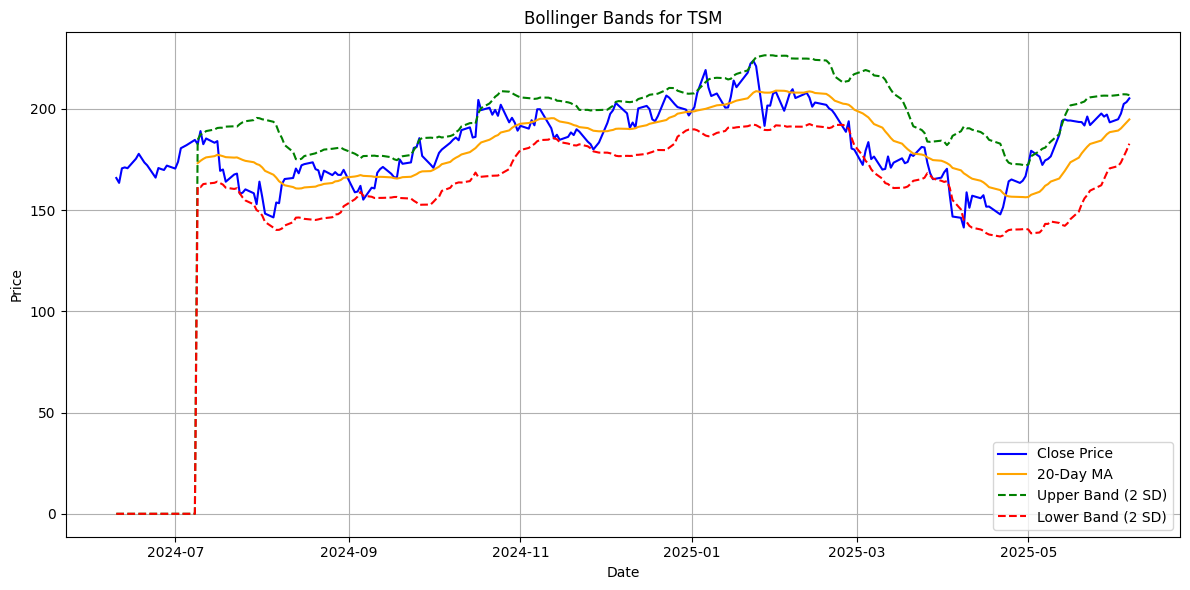

In [7]:
# plot a graph based on the function calculate_bollinger_bands
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np

def plot_bollinger_bands(data, stock_symbol, period=20, num_std_dev=2, window=20, num_std=2):
    upper_band, lower_band = calculate_bollinger_bands(data, period, num_std_dev)
    sma = calulate_sma(data, period)
    
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(sma, label=f'{window}-Day MA', color='orange')
    plt.plot(upper_band, label=f'Upper Band ({num_std} SD)', color='green', linestyle='--')
    plt.plot(lower_band, label=f'Lower Band ({num_std} SD)', color='red', linestyle='--')

    plt.title(f'Bollinger Bands for {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to plot Bollinger Bands
plot_bollinger_bands(data, stock_code, period=20, num_std_dev=2)

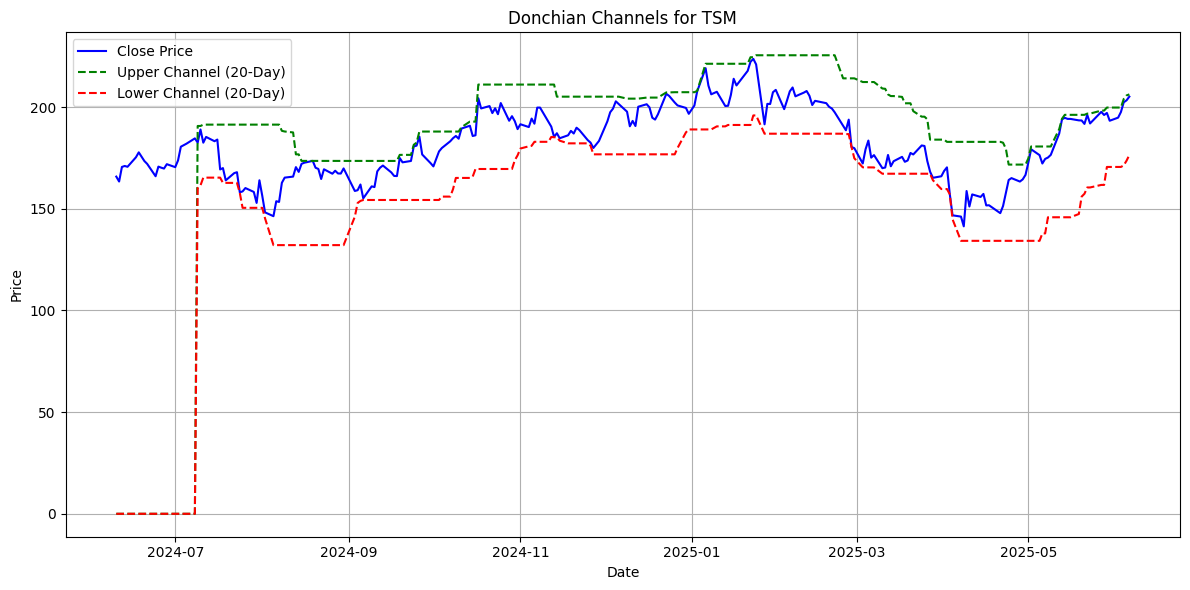

In [8]:
# plot a graph based on the function calculate_donchian_channels
def plot_donchian_channels(data, stock_symbol, period=20):
    upper_channel, lower_channel = calculate_donchian_channels(data, period)
    
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(upper_channel, label=f'Upper Channel ({period}-Day)', color='green', linestyle='--')
    plt.plot(lower_channel, label=f'Lower Channel ({period}-Day)', color='red', linestyle='--')

    plt.title(f'Donchian Channels for {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to plot Donchian Channels
plot_donchian_channels(data, stock_code, period=20)

Close data: Ticker             TSM
Date                  
2024-06-10  165.839890
2024-06-11  163.423691
2024-06-12  170.593384
2024-06-13  171.062332
2024-06-14  170.666595
...                ...
2025-06-02  194.839996
2025-06-03  197.610001
2025-06-04  202.399994
2025-06-05  203.339996
2025-06-06  205.179993

[249 rows x 1 columns]
short term ema
long term ema
macd done: Ticker           TSM
Date                
2024-06-10  0.000000
2024-06-11 -0.192745
2024-06-12  0.230381
2024-06-13  0.596674
2024-06-14  0.845288
...              ...
2025-06-02  6.784033
2025-06-03  6.669679
2025-06-04  6.886185
2025-06-05  7.052323
2025-06-06  7.248901

[249 rows x 1 columns] and type: <class 'pandas.core.frame.DataFrame'>
signal_line: Date
2024-06-10    0.000000
2024-06-11   -0.038549
2024-06-12    0.015237
2024-06-13    0.131525
2024-06-14    0.274277
                ...   
2025-06-02    7.136538
2025-06-03    7.043166
2025-06-04    7.011770
2025-06-05    7.019881
2025-06-06    7.065685
Name: Clo

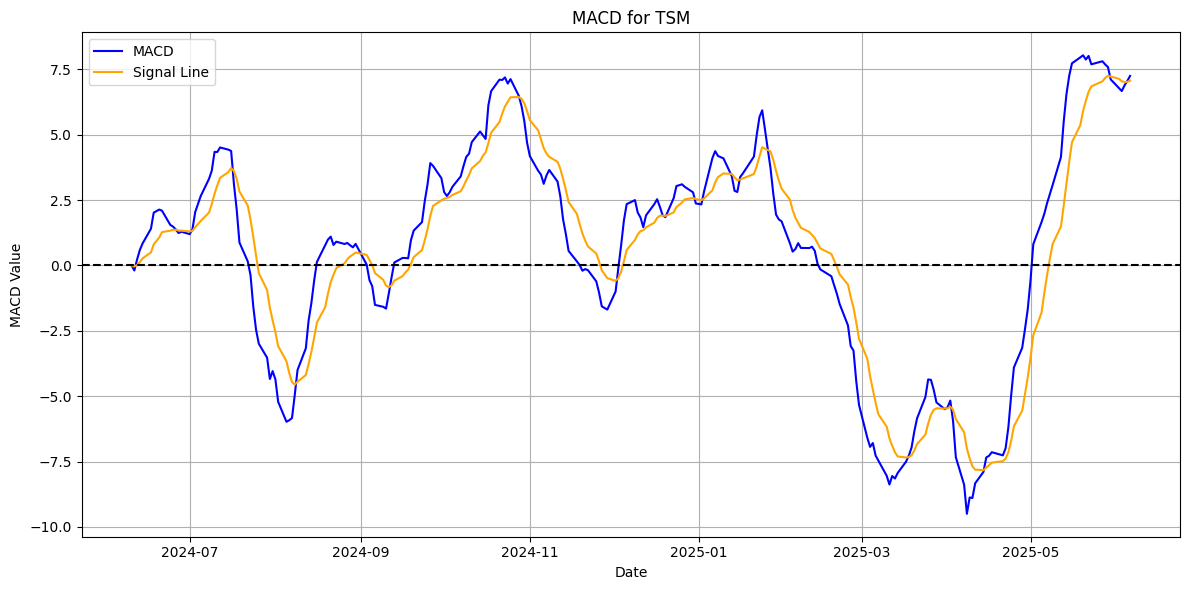

In [80]:
# plot a graph based on the function calculate_macd with historgram
def plot_macd(data, stock_symbol, short_period=12, long_period=26, signal_period=9):
    macd, signal_line, macd_diff = calculate_macd(data, stock_symbol, short_period, long_period, signal_period)
    
    plt.figure(figsize=(12, 6))
    plt.plot(macd, label='MACD', color='blue')
    plt.plot(signal_line, label='Signal Line', color='orange')
    plt.axhline(0, color='black', linestyle='--')

    plt.title(f'MACD for {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('MACD Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to plot MACD
plot_macd(data, stock_code, short_period=12, long_period=26, signal_period=9)

macd: Ticker           TSM
Date                
2024-06-10  0.000000
2024-06-11 -0.192745
2024-06-12  0.230381
2024-06-13  0.596674
2024-06-14  0.845288
...              ...
2025-06-02  6.784033
2025-06-03  6.669679
2025-06-04  6.886185
2025-06-05  7.052323
2025-06-06  7.248901

[249 rows x 1 columns] and type: <class 'pandas.core.frame.DataFrame'>
macd index shape: (249,), macd_diff shape: (249,)


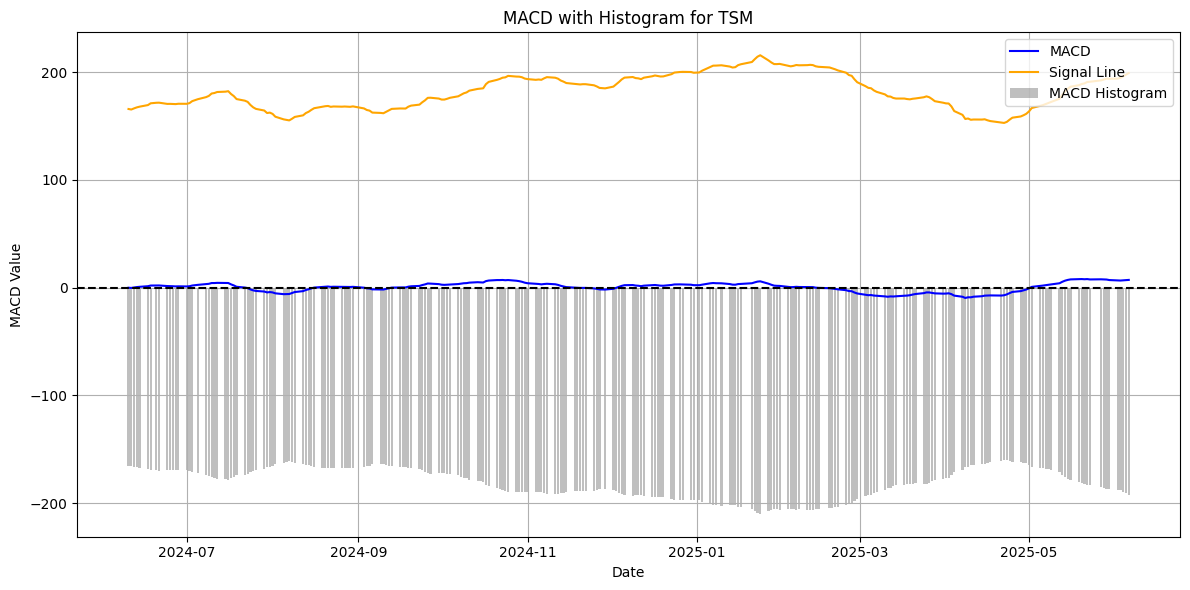

In [71]:
# plot a graph based on the function calculate_macd with historgram
def plot_macd_with_histogram(data, stock_symbol, short_period=12, long_period=26, signal_period=9):
    macd, signal_line, macd_diff = calculate_macd(data, stock_symbol, short_period, long_period, signal_period)
    
    plt.figure(figsize=(12, 6))
    plt.plot(macd, label='MACD', color='blue')
    plt.plot(signal_line, label='Signal Line', color='orange')
    print(f"macd index shape: {macd.index.shape}, macd_diff shape: {macd_diff.shape}")
    plt.bar(macd.index, macd_diff, label='MACD Histogram', color='gray', alpha=0.5)
    plt.axhline(0, color='black', linestyle='--')

    plt.title(f'MACD with Histogram for {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('MACD Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to plot MACD with histogram
plot_macd_with_histogram(data, stock_code, short_period=12, long_period=26, signal_period=9)

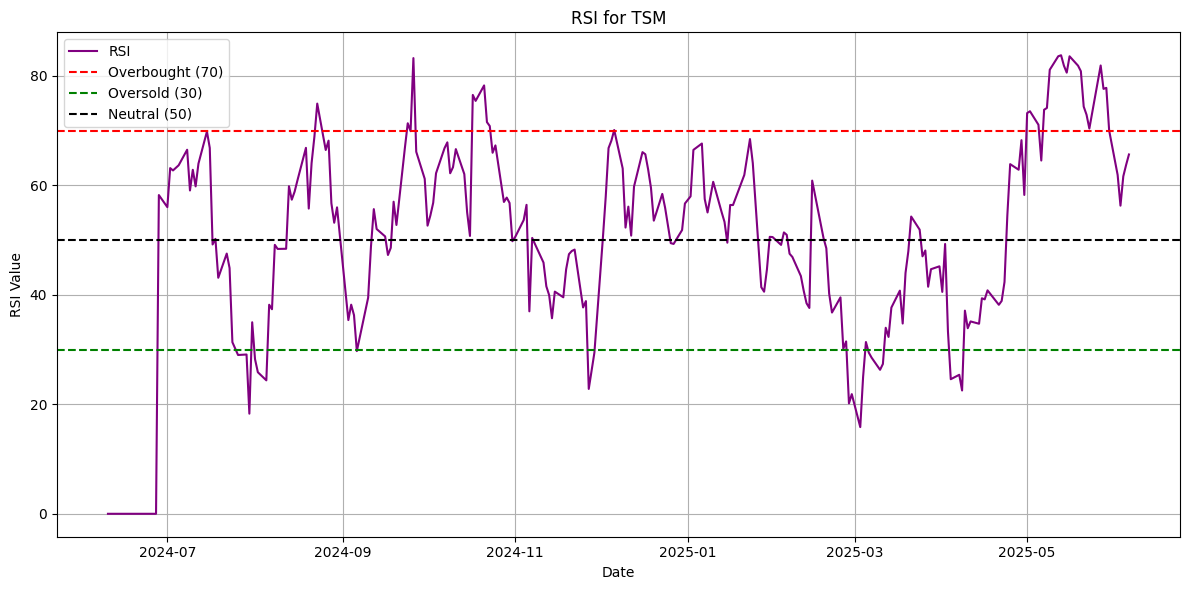

In [83]:
# plot a graph based on the function calculate_rsi
def plot_rsi(data, stock_symbol, period=14):
    rsi = calculate_rsi(data, period)
    
    plt.figure(figsize=(12, 6))
    plt.plot(rsi, label='RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.axhline(50, color='black', linestyle='--', label='Neutral (50)')

    plt.title(f'RSI for {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('RSI Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to plot RSI
plot_rsi(data, stock_code, period=14)

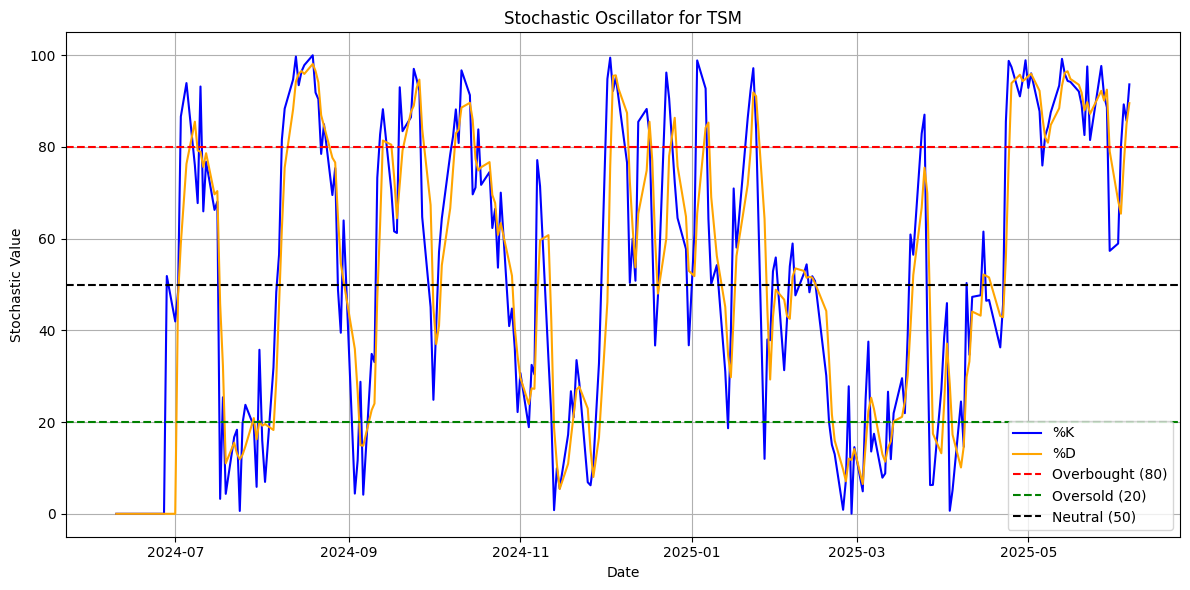

In [86]:
# plot a graph based on the function calculate_stochastic_oscillator
def plot_stochastic_oscillator(data, stock_symbol, period=14):
    k_percent, d_percent = calculate_stochastic_oscillator(data, period)
    
    plt.figure(figsize=(12, 6))
    plt.plot(k_percent, label='%K', color='blue')
    plt.plot(d_percent, label='%D', color='orange')
    plt.axhline(80, color='red', linestyle='--', label='Overbought (80)')
    plt.axhline(20, color='green', linestyle='--', label='Oversold (20)')
    plt.axhline(50, color='black', linestyle='--', label='Neutral (50)')

    plt.title(f'Stochastic Oscillator for {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Stochastic Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to plot Stochastic Oscillator
plot_stochastic_oscillator(data, stock_code, period=14)

In [111]:
def plot_ichimoku_cloud_v2(_data_, _stock_symbol_):
    # Calculate Ichimoku Cloud components
    tenkan_sen, kijun_sen, senkou_span_a, senkou_span_b, chikou_span = calculate_ichimoku_cloud_v2(_data_)

    # Plot the graph
    plt.figure(figsize=(12, 6))
    # plt.plot(_data_['Close'], label='Close Price', color='blue')
    # plt.plot(tenkan_sen, label='Tenkan-sen', color='red')
    # plt.plot(kijun_sen, label='Kijun-sen', color='green')
    plt.plot(senkou_span_a, label='Senkou Span A', color='orange')
    plt.plot(senkou_span_b, label='Senkou Span B', color='purple')
    print(f'senkou_span_a index shape: {senkou_span_a.index.shape}, senkou_span_b shape: {senkou_span_b.shape}')
    # plt.plot(chikou_span.index, chikou_span.iloc, marker='o', markersize=10, color='brown')

    # Plot the Kumo (Cloud)
    plt.fill_between(_data_.index, senkou_span_a, senkou_span_b, where=(senkou_span_a > senkou_span_b), color='lightgreen', alpha=0.5, label='Kumo (Cloud)')
    plt.fill_between(_data_.index, senkou_span_a, senkou_span_b, where=(senkou_span_a < senkou_span_b), color='lightcoral', alpha=0.5)

    # Set labels and title
    plt.title(f'Ichimoku Cloud for {_stock_symbol_}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# def plot_ichimoku_cloud_v2(_data_, stock_symbol):
#     # Calculate Ichimoku Cloud components
#     tenkan_sen, kijun_sen, senkou_span_a, senkou_span_b, chikou_span = calculate_ichimoku_cloud_v2(_data_)

#     # Plot the graph
#     plt.figure(figsize=(12, 6))
#     plt.plot(_data_['Close'], label='Close Price', color='blue')
#     plt.plot(tenkan_sen, label='Tenkan-sen', color='red')
#     plt.plot(kijun_sen, label='Kijun-sen', color='green')
#     plt.plot(senkou_span_a, label='Senkou Span A', color='orange')
#     plt.plot(senkou_span_b[~senkou_span_b.shift(1).isin(senkou_span_b)], label='Senkou Span B', color='purple')

#     # Plot the Kumo (Cloud)
#     plt.fill_between(range(len(_data_)), senkou_span_a, senkou_span_b[~senkou_span_b.shift(1).isin(senkou_span_b)], where=(senkou_span_a > senkou_span_b), color='lightgreen', alpha=0.5, label='Kumo (Cloud)')
#     plt.fill_between(range(len(_data_)), senkou_span_a, senkou_span_b[~senkou_span_b.shift(1).isin(senkou_span_b)], where=(senkou_span_a < senkou_span_b), color='lightcoral', alpha=0.5)

#     # Set labels and title
#     plt.title(f'Ichimoku Cloud for {stock_symbol}')
#     plt.xlabel('Date')
#     plt.ylabel('Price')
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

# # Call the function to plot Ichimoku Cloud
# plot_ichimoku_cloud_v2(data, stock_code)

type of senkou_span_a: <class 'pandas.core.frame.DataFrame'>
type of senkou_span_b: <class 'pandas.core.frame.DataFrame'>
type of chikou_span: <class 'pandas.core.frame.DataFrame'>
type of tenkan_sen: <class 'pandas.core.frame.DataFrame'>
type of kijun_sen: <class 'pandas.core.frame.DataFrame'>
tenkan_sen: Ticker             TSM
Date                  
2024-06-10         NaN
2024-06-11         NaN
2024-06-12         NaN
2024-06-13         NaN
2024-06-14         NaN
...                ...
2025-06-09  199.915001
2025-06-10  201.894997
2025-06-11  203.994995
2025-06-12  204.814995
2025-06-13  205.534996

[254 rows x 1 columns]
kijun_sen: Ticker             TSM
Date                  
2024-06-10         NaN
2024-06-11         NaN
2024-06-12         NaN
2024-06-13         NaN
2024-06-14         NaN
...                ...
2025-06-09  189.930000
2025-06-10  191.909996
2025-06-11  194.009995
2025-06-12  194.399994
2025-06-13  195.544998

[254 rows x 1 columns]
senkou_span_a: Ticker             T

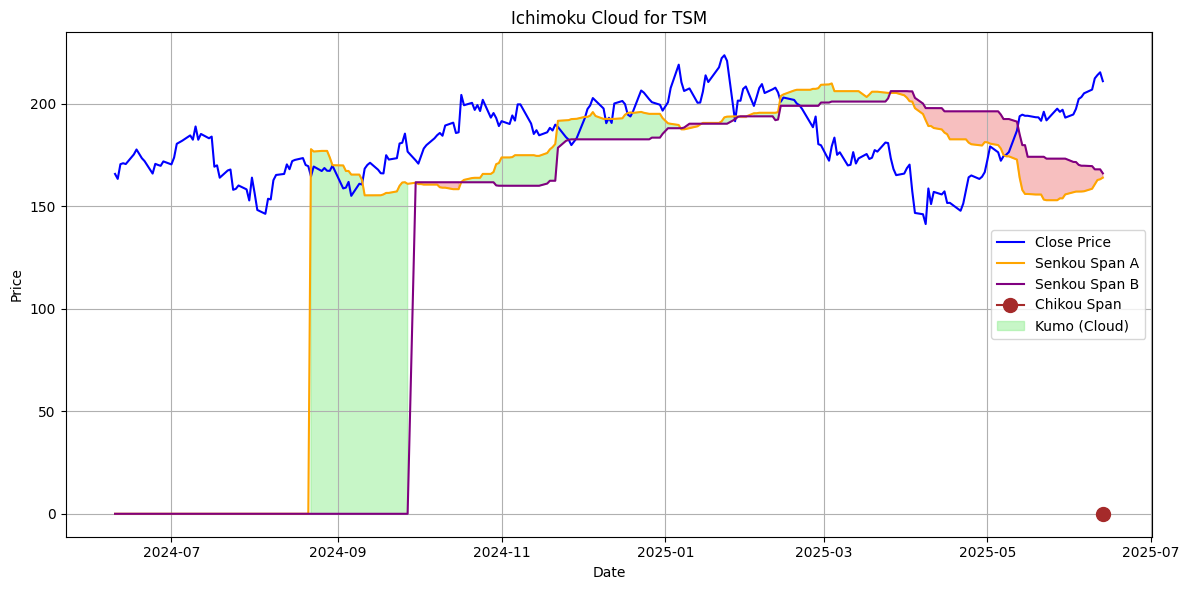

In [127]:
# plot a graph based on the function calculate_ichimoku_cloud
def plot_ichimoku_cloud(data, stock_symbol):
    tenkan_sen, kijun_sen, senkou_span_a, senkou_span_b, chikou_span = calculate_ichimoku_cloud(data)
    
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price', color='blue')
    # plt.plot(tenkan_sen, label='Tenkan-sen', color='red')
    # plt.plot(kijun_sen, label='Kijun-sen', color='green')
    plt.plot(senkou_span_a, label='Senkou Span A', color='orange')
    plt.plot(senkou_span_b, label='Senkou Span B', color='purple')
    # plt.plot(chikou_span.index, label='Chikou Span', color='brown')
    plt.plot(chikou_span.index[-1], chikou_span.iloc[-1], marker='o', markersize=10, color='brown', label='Chikou Span')


    print(f"type of senkou_span_a: {type(senkou_span_a)}, type of senkou_span_b: {type(senkou_span_b)}")
    print(f"shape of senkou_span_a: {senkou_span_a.shape}, shape of senkou_span_b: {senkou_span_b.shape}")
    plt.fill_between(data.index, senkou_span_a[stock_code], senkou_span_b[stock_code], where=(senkou_span_a[stock_code] > senkou_span_b[stock_code]), 
                     color='lightgreen', alpha=0.5, label='Kumo (Cloud)')
    plt.fill_between(data.index, senkou_span_a[stock_code], senkou_span_b[stock_code], where=(senkou_span_a[stock_code] < senkou_span_b[stock_code]), 
                     color='lightcoral', alpha=0.5)

    plt.title(f'Ichimoku Cloud for {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to plot Ichimoku Cloud
plot_ichimoku_cloud(data, stock_code)

### tradingview python implementation

In [36]:
import pandas as pd
import numpy as np
from lightweight_charts import Chart
import asyncio
import yfinance as yf
import nest_asyncio
nest_asyncio.apply()

In [44]:
# using yfinacnce

stock_code = 'T'
symbols = [stock_code]
data = yf.download(symbols, start='2024-06-09', end  ='2025-07-18', interval='1d')
print(data)

/var/folders/2w/3x_dqx25277_kfl6xbpr7gvr0000gn/T/ipykernel_1967/3908185551.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbols, start='2024-06-09', end  ='2025-07-18', interval='1d')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker              T          T          T          T         T
Date                                                            
2024-06-10  16.806988  16.976375  16.703473  16.938733  32414600
2024-06-11  16.806988  16.891682  16.684651  16.788167  29957000
2024-06-12  16.571728  16.976376  16.534085  16.929322  35652200
2024-06-13  16.628187  16.637598  16.392927  16.515262  30692000
2024-06-14  16.599957  16.703472  16.458801  16.552905  22652300
...               ...        ...        ...        ...       ...
2025-07-11  26.969999  27.549999  26.620001  27.549999  42713300
2025-07-14  27.160000  27.510000  27.020000  27.020000  30747000
2025-07-15  27.020000  27.120001  26.790001  26.930000  32266200
2025-07-16  26.950001  27.110001  26.879999  27.020000  21934400
2025-07-17  26.990000  27.049999  26.770000  26.799999  24546400

[276 rows x 5 columns]


In [45]:
data = data.reset_index()
# data['Date'] = pd.to_datetime(data['Date'])
data.columns = data.columns.droplevel(1)
data.rename(columns={
    'Date': 'time',
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Volume': 'volume'
}, inplace=True)


In [46]:
data

Price,time,close,high,low,open,volume
0,2024-06-10,16.806988,16.976375,16.703473,16.938733,32414600
1,2024-06-11,16.806988,16.891682,16.684651,16.788167,29957000
2,2024-06-12,16.571728,16.976376,16.534085,16.929322,35652200
3,2024-06-13,16.628187,16.637598,16.392927,16.515262,30692000
4,2024-06-14,16.599957,16.703472,16.458801,16.552905,22652300
...,...,...,...,...,...,...
271,2025-07-11,26.969999,27.549999,26.620001,27.549999,42713300
272,2025-07-14,27.160000,27.510000,27.020000,27.020000,30747000
273,2025-07-15,27.020000,27.120001,26.790001,26.930000,32266200
274,2025-07-16,26.950001,27.110001,26.879999,27.020000,21934400


In [47]:
# TradingView Charts

chart = Chart()
chart.set(data)
# chart.show(block=False)

In [48]:
data

Price,time,close,high,low,open,volume
0,2024-06-10,16.806988,16.976375,16.703473,16.938733,32414600
1,2024-06-11,16.806988,16.891682,16.684651,16.788167,29957000
2,2024-06-12,16.571728,16.976376,16.534085,16.929322,35652200
3,2024-06-13,16.628187,16.637598,16.392927,16.515262,30692000
4,2024-06-14,16.599957,16.703472,16.458801,16.552905,22652300
...,...,...,...,...,...,...
271,2025-07-11,26.969999,27.549999,26.620001,27.549999,42713300
272,2025-07-14,27.160000,27.510000,27.020000,27.020000,30747000
273,2025-07-15,27.020000,27.120001,26.790001,26.930000,32266200
274,2025-07-16,26.950001,27.110001,26.879999,27.020000,21934400


In [ ]:
chart.grid(vert_enabled = True, horz_enabled = True)

chart.layout(background_color='#131722', font_family='Trebuchet MS', font_size = 16)

# chart.candle_style(up_color='#2962ff', down_color='#e91e63',
#                    border_up_color='#2962ffcb', border_down_color='#e91e63cb',
#                    wick_up_color='#2962ffcb', wick_down_color='#e91e63cb')

chart.volume_config(up_color='#2962ffcb', down_color='#e91e63cb')

chart.name = stock_code
chart.legend(visible=True, font_family='Trebuchet MS', ohlc=True, percent=True)


chart.set(data)

# implement the sma
def calculate_sma_df(df, period: int = 50):
    return pd.DataFrame({
        'time': df['time'],
        f'SMA {period}': df['close'].rolling(window=period).mean()
    }).fillna(0)

sma9_line = chart.create_line(name='SMA 9', color='#ffeb3b', width=1, price_label=False)
sma9_data = calculate_sma_df(data, period=9)
sma9_line.set(sma9_data)

sma4_line = chart.create_line(name='SMA 4', color ="#5f3bff", width=1, price_label=False)
sma4_data = calculate_sma_df(data, period=4)
sma4_line.set(sma4_data)

# implement the doncian channels to lightweight_charts Chart object
# def calculate_donchian_channels_df(df, period: int = 20):
#     high = df['high'].rolling(window=period).max()
#     low = df['low'].rolling(window=period).min()
#     mean = (high + low) / 2
#     return pd.DataFrame({
#         'time': df['time'],
#         f'Upper Donchian {period}': high.fillna(0),
#         f'Mean Donchian {period}': mean.fillna(0),
#         f'Lower Donchian {period}': low.fillna(0)
#     })

# donchian20_data = calculate_donchian_channels_df(data, period=20)
# donchian20_upper_line = chart.create_line(name='Upper Donchian 20', color="#00ff11", width=1, price_line=False, price_label=False)
# donchian20_lower_line = chart.create_line(name='Lower Donchian 20', color="#ff4800", width=1, price_line=False, price_label=False)
# donchian20_mean_line = chart.create_line(name='Mean Donchian 20', color="#ffffff", width=1, price_line=False, price_label=False)
# donchian20_upper_line.set(donchian20_data)
# donchian20_lower_line.set(donchian20_data)
# donchian20_mean_line.set(donchian20_data)

# implement the bollinger bands to lightweight_charts Chart object
# def calculate_bollinger_bands_df(df, period: int = 20, num_std_dev: int = 2):
#     sma = df['close'].rolling(window=period).mean()
#     rolling_std = df['close'].rolling(window=period).std()
#     upper_band = sma + (rolling_std * num_std_dev)
#     lower_band = sma - (rolling_std * num_std_dev)      
#     return pd.DataFrame({
#         'time': df['time'],
#         f'Upper Bollinger {period}': upper_band.fillna(0),
#         f'Mean Bollinger {period}': sma.fillna(0),
#         f'Lower Bollinger {period}': lower_band.fillna(0)
#     })

# bollinger20_data = calculate_bollinger_bands_df(data, period=20, num_std_dev=2)
# bollinger20_upper_line = chart.create_line(name='Upper Bollinger 20', color="#00fff2", width=1, price_line=False, price_label=False)
# bollinger20_lower_line = chart.create_line(name='Lower Bollinger 20', color="#ff0000", width=1, price_line=False, price_label=False)
# bollinger20_mean_line = chart.create_line(name='Mean Bollinger 20', color="#ffffff", width=1, price_line=False, price_label=False)
# bollinger20_upper_line.set(bollinger20_data)
# bollinger20_lower_line.set(bollinger20_data)
# bollinger20_mean_line.set(bollinger20_data)

# implement the ichimoku cloud to lightweight_charts Chart object
# def calculate_ichimoku_cloud_df(df):
#     nine_period_high = df['high'].rolling(window=9).max()
#     nine_period_low = df['low'].rolling(window=9).min()
#     tenkan_sen = (nine_period_high + nine_period_low) / 2

#     period26_high = df['high'].rolling(window=26).max()
#     period26_low = df['low'].rolling(window=26).min()
#     kijun_sen = (period26_high + period26_low) / 2

#     senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(26)
#     senkou_span_b = ((df['high'].rolling(window=52).max() + df['low'].rolling(window=52).min()) / 2).shift(26)

#     chikou_span = df['close'].shift(-26)

#     return pd.DataFrame({
#         'time': df['time'],
#         'Tenkan-sen': tenkan_sen.fillna(0),
#         'Kijun-sen': kijun_sen.fillna(0),
#         'Senkou Span A': senkou_span_a.fillna(0),
#         'Senkou Span B': senkou_span_b.fillna(0),
#         'Chikou Span': chikou_span.fillna(0)
#     })

# ichimoku_data = calculate_ichimoku_cloud_df(data)
# tenkan_sen_line = chart.create_line(name='Tenkan-sen', color="#00ff00", width=1, price_line=False, price_label=False)
# kijun_sen_line = chart.create_line(name='Kijun-sen', color="#ff00ff", width=1, price_line=False, price_label=False)
# senkou_span_a_line = chart.create_line(name='Senkou Span A', color="#00ffff", width=1, price_line=False, price_label=False)
# senkou_span_b_line = chart.create_line(name='Senkou Span B', color="#ff00ff", width=1, price_line=False, price_label=False)
# chikou_span_line = chart.create_line(name='Chikou Span', color="#ffffff", width=1, price_line=False, price_label=False)
# tenkan_sen_line.set(ichimoku_data)
# kijun_sen_line.set(ichimoku_data)
# senkou_span_a_line.set(ichimoku_data)
# senkou_span_b_line.set(ichimoku_data)
# chikou_span_line.set(ichimoku_data)

# implement fibonacci retracement levels
# def calculate_fibonacci_retracement(df, start_time, end_time, levels=[0.236, 0.382, 0.618, 0.786]):

#     # set the df to the specified time range
#     df = df[(df['time'] >= start_time) & (df['time'] <= end_time)]
#     if df.empty:
#         raise ValueError("DataFrame is empty for the specified time range.")

#     max_price = df['high'].max()
#     min_price = df['low'].min()
#     diff = max_price - min_price
#     fib_levels = {f'Fib {level}': max_price - (diff * level) for level in levels}
#     fib_levels['time'] = df['time']
#     return pd.DataFrame(fib_levels) 

# fibonacci_data = calculate_fibonacci_retracement(data, start_time='2025-06-09', end_time='2025-07-08')
# fib_lines = {}
# for level, color in zip(fibonacci_data.columns[:-1], ["#CACACA", "#CACACA", "#CACACA", "#CACACA"]):
#     fib_lines[level] = chart.create_line(name=level, color=color, width=1, price_line=False, price_label=False)
#     fib_lines[level].set(fibonacci_data)        

# implement the RSI
def calculate_rsi_df(df, period=14, close_col='close'):
    df['close_new'] = df[close_col]  # Adjust close prices
    delta = df[close_col].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    # plot 30% and 70% lines
    return pd.DataFrame({
        'time': df['time'],
        'RSI': rsi.fillna(0),
        'RSI 30%': [30] * len(df),
        'RSI 70%': [70] * len(df)
    })

rsi_data = calculate_rsi_df(data, period=14)
rsi_line = chart.create_line(name='RSI', color="#ff00ff", width=1, price_line=False, price_label=False)
rsi_30_line = chart.create_line(name='RSI 30%', color="#ff0000", width=1, price_line=False, price_label=False)
rsi_70_line = chart.create_line(name='RSI 70%', color="#00ff00", width=1, price_line=False, price_label=False)
rsi_30_line.set(rsi_data)
rsi_70_line.set(rsi_data)
rsi_line.set(rsi_data)  

# implement the stochastic oscillator
def calculate_stochastic_oscillator_df(df, period=14):

    df['low_new'] = df['low']
    df['high_new'] = df['high']
    df['close_new'] = df['close']
    low_min = df['low_new'].rolling(window=period).min()
    high_max = df['high_new'].rolling(window=period).max()
    k_percent = 100 * ((df['close_new'] - low_min) / (high_max - low_min))
    d_percent = k_percent.rolling(window=3).mean()

    return pd.DataFrame({
        'time': df['time'],
        '%K': k_percent.fillna(0),
        '%D': d_percent.fillna(0),
        'Stochastic 20%': [20] * len(df),
        'Stochastic 80%': [80] * len(df)
    })

stochastic_data = calculate_stochastic_oscillator_df(data, period=14)
stochastic_k_line = chart.create_line(name='%K', color="#ff00ff", width=1, price_line=False, price_label=False)
stochastic_d_line = chart.create_line(name='%D', color="#00ffff", width=1, price_line=False, price_label=False)
stochastic_20_line = chart.create_line(name='Stochastic 20%', color="#ff0000", width=1, price_line=False, price_label=False)
stochastic_80_line = chart.create_line(name='Stochastic 80%', color="#00ff00", width=1, price_line=False, price_label=False)
stochastic_k_line.set(stochastic_data)
stochastic_d_line.set(stochastic_data)
stochastic_20_line.set(stochastic_data)
stochastic_80_line.set(stochastic_data)

# Show the chart
chart.set(data)

chart.show(block=True)


In [ ]:
# chart2 = Chart()
# chart2.grid(vert_enabled = True, horz_enabled = True)

# chart2.layout(background_color='#131722', font_family='Trebuchet MS', font_size = 16)

# # chart.candle_style(up_color='#2962ff', down_color='#e91e63',
# #                    border_up_color='#2962ffcb', border_down_color='#e91e63cb',
# #                    wick_up_color='#2962ffcb', wick_down_color='#e91e63cb')

# chart2.volume_config(up_color='#2962ffcb', down_color='#e91e63cb')

# chart2.name = stock_code
# chart2.legend(visible=True, font_family='Trebuchet MS', ohlc=True, percent=True)


# chart2.set(data)

# # implement the RSI
# def calculate_rsi_df(df, period=14, close_col='close'):
#     df['close_new'] = df[close_col]  # Adjust close prices
#     delta = df[close_col].diff()
#     gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
#     loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
#     rs = gain / loss
#     rsi = 100 - (100 / (1 + rs))

#     # plot 30% and 70% lines
#     return pd.DataFrame({
#         'time': df['time'],
#         'RSI': rsi.fillna(0),
#         'RSI 30%': [30] * len(df),
#         'RSI 70%': [70] * len(df)
#     })

# rsi_data = calculate_rsi_df(data, period=14)
# rsi_line = chart2.create_line(name='RSI', color="#ff00ff", width=1, price_line=False, price_label=False)
# rsi_30_line = chart2.create_line(name='RSI 30%', color="#ff0000", width=1, price_line=False, price_label=False)
# rsi_70_line = chart2.create_line(name='RSI 70%', color="#00ff00", width=1, price_line=False, price_label=False)
# rsi_30_line.set(rsi_data)
# rsi_70_line.set(rsi_data)
# rsi_line.set(rsi_data)  

# # implement the stochastic oscillator
# def calculate_stochastic_oscillator_df(df, period=14):
#     # substract 100 and create new series on 'low' and 'high' columns
#     df['low_new'] = df['low']
#     df['high_new'] = df['high']
#     df['close_new'] = df['close']
#     low_min = df['low_new'].rolling(window=period).min()
#     high_max = df['high_new'].rolling(window=period).max()
#     k_percent = 100 * ((df['close_new'] - low_min) / (high_max - low_min))
#     d_percent = k_percent.rolling(window=3).mean()

#     return pd.DataFrame({
#         'time': df['time'],
#         '%K': k_percent.fillna(0),
#         '%D': d_percent.fillna(0),
#         'Stochastic 20%': [20] * len(df),
#         'Stochastic 80%': [80] * len(df)
#     })

# stochastic_data = calculate_stochastic_oscillator_df(data, period=14)
# stochastic_k_line = chart2.create_line(name='%K', color="#ff00ff", width=1, price_line=False, price_label=False)
# stochastic_d_line = chart2.create_line(name='%D', color="#00ffff", width=1, price_line=False, price_label=False)
# stochastic_20_line = chart2.create_line(name='Stochastic 20%', color="#ff0000", width=1, price_line=False, price_label=False)
# stochastic_80_line = chart2.create_line(name='Stochastic 80%', color="#00ff00", width=1, price_line=False, price_label=False)
# stochastic_k_line.set(stochastic_data)
# stochastic_d_line.set(stochastic_data)
# stochastic_20_line.set(stochastic_data)
# stochastic_80_line.set(stochastic_data)

# # Show the chart
# chart2.set(data)

# chart2.show(block=True)

### tests

In [1]:
import pandas as pd
import numpy as np
from lightweight_charts import Chart
import yfinance as yf

In [2]:
# using yfinacnce

stock_code_1 = 'T'
stock_code_2 = 'AAPL'
symbols = [stock_code_1, stock_code_2]
data = yf.download(symbols, start='2024-06-09', end  ='2025-07-18', interval='1d')
print(data)

/var/folders/2w/3x_dqx25277_kfl6xbpr7gvr0000gn/T/ipykernel_1952/2992319506.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbols, start='2024-06-09', end  ='2025-07-18', interval='1d')
[*********************100%***********************]  2 of 2 completed

Price            Close                   High                    Low  \
Ticker            AAPL          T        AAPL          T        AAPL   
Date                                                                   
2024-06-10  192.221039  16.806986  196.381589  16.976373  191.255553   
2024-06-11  206.185730  16.806986  206.195693  16.891680  192.728675   
2024-06-12  212.078201  16.571728  219.175002  16.976376  205.936908   
2024-06-13  213.242737  16.628187  215.741048  16.637598  210.615026   
2024-06-14  211.500870  16.599958  214.168387  16.703473  210.316407   
...                ...        ...         ...        ...         ...   
2025-07-11  211.160004  26.969999  212.130005  27.549999  209.860001   
2025-07-14  208.619995  27.160000  210.910004  27.510000  207.539993   
2025-07-15  209.110001  27.020000  211.889999  27.120001  208.919998   
2025-07-16  210.160004  26.950001  212.399994  27.110001  208.639999   
2025-07-17  210.020004  26.990000  211.800003  27.049999  209.58

In [4]:
# make the Ticker symbol be the frist column and all the T and AAPL stocks data(close, open, high, low, volume) stack on those columns
data = data.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index()
# data.columns = data.columns.droplevel(1)
data 

,Date,Ticker,0
0,0,Date,2024-06-10 00:00:00
1,0,Ticker,Close
2,0,AAPL,192.221039
3,0,T,16.806986
4,1,Date,2024-06-10 00:00:00
...,...,...,...
5515,1378,T,26.799999
5516,1379,Date,2025-07-17 00:00:00
5517,1379,Ticker,Volume
5518,1379,AAPL,48068100.0


In [3]:
data = data.reset_index()
# data['Date'] = pd.to_datetime(data['Date'])
data.columns = data.columns.droplevel(1)

In [4]:
data

Price,Date,Close,Close,High,High,Low,Low,Open,Open,Volume,Volume
0,2024-06-10,192.221024,16.806986,196.381574,16.976373,191.255538,16.703471,195.983426,16.938731,97010200,32414600
1,2024-06-11,206.185715,16.806986,206.195678,16.891680,192.728661,16.684650,192.748557,16.788165,172373300,29957000
2,2024-06-12,212.078201,16.571728,219.175002,16.976376,205.936908,16.534085,206.404722,16.929322,198134300,35652200
3,2024-06-13,213.242737,16.628187,215.741048,16.637598,210.615026,16.392927,213.740409,16.515262,97862700,30692000
4,2024-06-14,211.500870,16.599957,214.168387,16.703472,210.316407,16.458801,212.854540,16.552905,70122700,22652300
...,...,...,...,...,...,...,...,...,...,...,...
271,2025-07-11,211.160004,26.969999,212.130005,27.549999,209.860001,26.620001,210.570007,27.549999,39765800,42713300
272,2025-07-14,208.619995,27.160000,210.910004,27.510000,207.539993,27.020000,209.929993,27.020000,38840100,30747000
273,2025-07-15,209.110001,27.020000,211.889999,27.120001,208.919998,26.790001,209.220001,26.930000,42296300,32266200
274,2025-07-16,210.160004,26.950001,212.399994,27.110001,208.639999,26.879999,210.300003,27.020000,47490500,21934400


### Test Callbacks

In [1]:
import os
import pandas as pd
import numpy as np
from lightweight_charts import Chart
import asyncio
import yfinance as yf
import nest_asyncio
nest_asyncio.apply()

In [2]:
# using yfinance
stock_code = 'T'
symbols = [stock_code]
data = yf.download(symbols, start='2024-06-09', end  ='2025-07-18', interval='1d')
print(data)

/var/folders/2w/3x_dqx25277_kfl6xbpr7gvr0000gn/T/ipykernel_2733/3604960093.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbols, start='2024-06-09', end  ='2025-07-18', interval='1d')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker              T          T          T          T         T
Date                                                            
2024-06-10  16.806986  16.976373  16.703471  16.938731  32414600
2024-06-11  16.806986  16.891680  16.684650  16.788165  29957000
2024-06-12  16.571728  16.976376  16.534085  16.929322  35652200
2024-06-13  16.628189  16.637600  16.392929  16.515263  30692000
2024-06-14  16.599958  16.703473  16.458803  16.552907  22652300
...               ...        ...        ...        ...       ...
2025-07-11  26.969999  27.549999  26.620001  27.549999  42713300
2025-07-14  27.160000  27.510000  27.020000  27.020000  30747000
2025-07-15  27.020000  27.120001  26.790001  26.930000  32266200
2025-07-16  26.950001  27.110001  26.879999  27.020000  21934400
2025-07-17  26.990000  27.049999  26.770000  26.799999  24546400

[276 rows x 5 columns]


In [3]:
# settings
stocks_list = ()
stock_code = 'TSM'
stock_data_path = "./data"
start_date = '2024-06-09'
end_date = '2024-07-26'
interval = '1d'
save_flag = True
excel_extensions = ['.xlsx', '.xls', '.xlsm', 'csv']



In [4]:
def contains_excel_file(path: str, filename: str) -> bool:
    if not os.path.isdir(path):
        print("Invalid directory path.")
        return False

    for root, dirs, files in os.walk(path):
        for file in files:
            if filename.lower() == file.lower():
                return True

    print("No Excel files found.")
    return False

def download_yf_data(stock_code: str, stock_data_path: str, start_date: str, end_date: str, interval: str = '1d', save_flag: bool = True) -> pd.DataFrame:
    """
    Download stock data from Yahoo Finance.
    
    :param stock_code: Stock ticker symbol.
    :param start_date: Start date for the data in 'YYYY-MM-DD' format.
    :param end_date: End date for the data in 'YYYY-MM-DD' format.
    :param interval: Data interval (default is '1d').
    :return: DataFrame with stock data.
    """

    data = yf.download([stock_code], start=start_date, end=end_date, interval=interval)
    data = preprocess_stock_data(data)
    if save_flag:
        data.to_csv(f"{stock_data_path}/{stock_code}_{end_date}.csv")
    return data

def get_bar_data(stock_code: str, stock_data_path: str, start_date: str, end_date: str, interval: str = '1d', save_flag: bool = True) -> pd.DataFrame:
    """    Get bar data for a given stock symbol.
    :param symbol: Stock ticker symbol.
    :return: DataFrame with stock data or an empty DataFrame if no data is found
    """

    if contains_excel_file(stock_data_path, f"{stock_code}_{end_date}.csv") is False:
        print(f'No data for "{stock_code}" download it from Yahoo Finance')
        return download_yf_data(stock_code=stock_code, stock_data_path=stock_data_path, start_date=start_date, end_date=end_date, interval=interval, save_flag=save_flag)
    print(f'Get data for "{stock_code}" from {stock_data_path}')
    return pd.read_csv(f'{stock_data_path}/{stock_code}_{end_date}.csv')

# twist the stock data for downstream processing
def preprocess_stock_data(data: pd.DataFrame) -> pd.DataFrame:
    """
    Preprocess stock data to have a consistent format.
    
    :param data: DataFrame with stock data.
    :return: Preprocessed DataFrame.
    """
    data = data.reset_index()
    data.columns = data.columns.droplevel(1)
    data.rename(columns={
        'Date': 'time',
        'Open': 'open',
        'High': 'high',
        'Low': 'low',
        'Close': 'close',
        'Volume': 'volume'
    }, inplace=True)
    return data

def on_search(chart, searched_string):  # Called when the user searches.
    new_data = get_bar_data(searched_string, stock_data_path, start_date, end_date, interval, save_flag)
    if new_data.empty:
        return
    chart.topbar['symbol'].set(searched_string)
    chart.set(new_data)

def on_timeframe_selection(chart):  # Called when the user changes the timeframe.
    new_data = get_bar_data(stock_code, stock_data_path, start_date, end_date, interval, save_flag)
    if new_data.empty:
        return
    chart.set(new_data, True)

def on_timeframe_selection(chart):  # Called when the user changes the timeframe.
    new_data = get_bar_data(stock_code, stock_data_path, start_date, end_date, interval, save_flag)
    if new_data.empty:
        return
    chart.set(new_data, True)

def on_horizontal_line_move(chart, line):
    print(f'Horizontal line moved to: {line.price}')


In [5]:
data = get_bar_data(stock_code, stock_data_path, start_date, end_date, interval, save_flag)

chart = Chart(toolbox=True)
chart.layout(background_color='#131722', font_family='Trebuchet MS', font_size = 16)
chart.volume_config(up_color='#2962ffcb', down_color='#e91e63cb')
chart.name = stock_code
chart.legend(visible=True, font_family='Trebuchet MS', ohlc=True, percent=True)
chart.events.search += on_search
chart.topbar.textbox('symbol', stock_code)
# chart.topbar.switcher('timeframe', (interval), default=interval, func=on_timeframe_selection)
chart.set(data)
chart.horizontal_line(200, func=on_horizontal_line_move)
chart.show(block=True)



/var/folders/2w/3x_dqx25277_kfl6xbpr7gvr0000gn/T/ipykernel_2733/2005638316.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download([stock_code], start=start_date, end=end_date, interval=interval)
[*********************100%***********************]  1 of 1 completed

No Excel files found.
No data for "TSM" download it from Yahoo Finance


No Excel files found.
No data for "T" download it from Yahoo Finance


/var/folders/2w/3x_dqx25277_kfl6xbpr7gvr0000gn/T/ipykernel_2733/2005638316.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download([stock_code], start=start_date, end=end_date, interval=interval)
[*********************100%***********************]  1 of 1 completed


Get data for "TSM" from ./data
Get data for "T" from ./data


In [12]:
stocks_list

()

In [7]:
data.index

RangeIndex(start=0, stop=32, step=1)

In [6]:
contains_excel_file(stock_data_path, f"{stock_code}.csv")

True